In [1]:
import sys
sys.path.append('../src')
import os
import glob
import json
import torch
import numpy as np
from semantic_bac_segment.segmentator import Segmentator
from semantic_bac_segment.model_loader import model_loader
import tifffile
import pandas as pd


# Get images
path_images='../../Semantic_bac_segment/data/source_norm'
path_masks='../../Semantic_bac_segment/data/masks_cleaned'
image_files = [os.path.join(path_images, file) for file in os.listdir(path_images) if file.endswith('.tiff')]
mask_files = [os.path.join(path_masks, file) for file in os.listdir(path_masks) if file.endswith('.tiff')]

image_files.sort()
mask_files.sort()

max_width, max_height=2400, 2400

for image_path, mask_path in zip(image_files, mask_files):

    print(f'{os.path.basename(image_path)} paired with {os.path.basename(mask_path)}')

coli_mask_frame_1.tiff paired with coli_mask_frame_1.tiff
coli_mask_frame_10.tiff paired with coli_mask_frame_10.tiff
coli_mask_frame_101.tiff paired with coli_mask_frame_101.tiff
coli_mask_frame_109.tiff paired with coli_mask_frame_109.tiff
coli_mask_frame_132.tiff paired with coli_mask_frame_132.tiff
coli_mask_frame_165.tiff paired with coli_mask_frame_165.tiff
coli_mask_frame_166.tiff paired with coli_mask_frame_166.tiff
coli_mask_frame_205.tiff paired with coli_mask_frame_205.tiff
coli_mask_frame_223.tiff paired with coli_mask_frame_223.tiff
coli_mask_frame_232.tiff paired with coli_mask_frame_232.tiff
coli_mask_frame_274.tiff paired with coli_mask_frame_274.tiff
coli_mask_frame_56.tiff paired with coli_mask_frame_56.tiff
mabs_img_01.tiff paired with mabs_img_01.tiff
mabs_img_02.tiff paired with mabs_img_02.tiff
mabs_img_03.tiff paired with mabs_img_03.tiff
mabs_img_04.tiff paired with mabs_img_04.tiff
mabs_img_05.tiff paired with mabs_img_05.tiff
mabs_img_06.tiff paired with mabs_

In [63]:

max_width, max_height=2400, 2400

padded_images = []
padded_masks = []
original_dimensions = {}

for image_path, mask_path in zip(image_files, mask_files):
    print(image_path)
    image_name=os.path.basename(mask_path)
    image = tifffile.imread(image_path)
    mask = tifffile.imread(mask_path)

    height, width = image.shape
    original_dimensions[image_name] = (height, width)

    pad_height = max_height - height
    pad_width = max_width - width
    
    # Pad the image with zeros
    padded_image = np.pad(image, ((0, pad_height), (0, pad_width)), mode='symmetric')
    padded_images.append(padded_image)
    
    # Pad the mask with zeros
    padded_mask = np.pad(mask, ((0, pad_height), (0, pad_width)), mode='symmetric')
    padded_mask = padded_mask.astype(mask.dtype)  # Ensure the padded mask has the same data type as the original mask

    padded_masks.append(padded_mask)

# Convert the padded images and masks to stacks
image_stack = np.stack(padded_images)
mask_stack = np.stack(padded_masks)

# Print the shape of the stacks
print("Image stack shape:", image_stack.shape)
print("Mask stack shape:", mask_stack.shape)


../../Semantic_bac_segment/data/source_norm/coli_mask_frame_1.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_10.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_101.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_109.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_132.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_165.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_166.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_205.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_223.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_232.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_274.tiff
../../Semantic_bac_segment/data/source_norm/coli_mask_frame_56.tiff
../../Semantic_bac_segment/data/source_norm/mabs_img_01.tiff
../../Semantic_bac_segment/data/source_norm/mabs_img_02.tiff
../../Semantic_bac_segment/data/source_norm/mabs_img_0

In [64]:
image_stack=np.expand_dims(image_stack, axis=1)
mask_stack=np.expand_dims(mask_stack, axis=1)

print(f'mask stack shape = {mask_stack.shape}, image stack shape {image_stack.shape}')

mask stack shape = (47, 1, 2400, 2400), image stack shape (47, 1, 2400, 2400)


In [65]:

results_folder='../results/top_models3'
models_dict = []
for file in os.listdir(results_folder):
    if file.endswith('_model.pth'):
        model_path = os.path.join(results_folder, file)
        config_path = os.path.join(results_folder, file.replace('_model.pth', '_config.json'))

        # Check if the corresponding config file exists
        if os.path.exists(config_path):
            # Add the model and its configuration to the dictionary
            models_dict.append((model_path, config_path))
        else:
            print(f"Warning: Config file not found for model {file}")

models_dict

[('../results/top_models3/MonaiUnet-binary-top-4_best_model.pth',
  '../results/top_models3/MonaiUnet-binary-top-4_best_config.json'),
 ('../results/top_models3/MonaiUnet-binary-top-3_best_model.pth',
  '../results/top_models3/MonaiUnet-binary-top-3_best_config.json'),
 ('../results/top_models3/MonaiUnet-binary-top-3_final_model.pth',
  '../results/top_models3/MonaiUnet-binary-top-3_final_config.json'),
 ('../results/top_models3/atomai_unet-binary-top-1_final_model.pth',
  '../results/top_models3/atomai_unet-binary-top-1_final_config.json'),
 ('../results/top_models3/base_unet-binary-top-4_final_model.pth',
  '../results/top_models3/base_unet-binary-top-4_final_config.json'),
 ('../results/top_models3/base_unet-binary-top-5_final_model.pth',
  '../results/top_models3/base_unet-binary-top-5_final_config.json'),
 ('../results/top_models3/base_unet-binary-top-5_best_model.pth',
  '../results/top_models3/base_unet-binary-top-5_best_config.json'),
 ('../results/top_models3/atomai_unet-binar

In [66]:
import json
from semantic_bac_segment.utils import get_device
for i, params_i in enumerate(models_dict):
  try:
    with open(params_i[1]) as f:
      model_param = json.load(f)
      model_i=model_loader(model_param, get_device(), weights=params_i[0])
  except Exception as e:
    print(f"Error loading model {params_i[0]}: {e}")
    models_dict.pop(i)

In [67]:
models_dict[1]

('../results/top_models3/MonaiUnet-binary-top-3_best_model.pth',
 '../results/top_models3/MonaiUnet-binary-top-3_best_config.json')

In [68]:
mask_stack_binary=np.where(mask_stack > 100, 1, 0)


In [69]:
models_dict[-2]

('../results/top_models3/MonaiUnet-binary-top-biasdrop3_final_model.pth',
 '../results/top_models3/MonaiUnet-binary-top-biasdrop3_final_config.json')

In [32]:
from semantic_bac_segment.utils import get_device
i=np.random.choice(len(models_dict), size=1, replace=False)

device=get_device()
pair_i = models_dict[int(-2)]
with open(pair_i[1]) as f:
#with open(config_path) as f:
    model_param = json.load(f)
    model_i=model_loader(model_param, device)
print(f'Evaluating model {pair_i[-2]}')

segmentator = Segmentator(pair_i[0], model_graph=model_i, patch_size=256, overlap_ratio=0.25, half_precision=True)

Evaluating model ../results/top_models/top_models2/MonaiUnet-4class-top-3_best_model.pth


In [34]:
from monai.data import ArrayDataset
from monai.inferers import SlidingWindowInferer
from monai.metrics import ConfusionMatrixMetric
from semantic_bac_segment.utils import normalize_percentile, empty_gpu_cache, tensor_debugger
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


import numpy as np

def scale_image(image):
    """
    Scale an image to the range [0, 1].

    Args:
        image (numpy.ndarray): Input image.

    Returns:
        numpy.ndarray: Scaled image.
    """
    min_value = np.min(image)
    max_value = np.max(image)
    scaled_image = (image - min_value) / (max_value - min_value)
    return scaled_image

device=get_device()
# Create an instance of the Inferer
inferer = SlidingWindowInferer(
    device=device,
    roi_size=(256, 256),  # Specify the desired output size
    overlap=.1
)

# Initialize variables to store the predicted and ground truth labels
predicted_labels = []
ground_truth_labels = []

pair_i = models_dict[int(1)]
with open(pair_i[1]) as f:

    model_param = json.load(f)
    model_i=model_loader(model_param, device)# Iterate over the dataset using the sliding_window_inference method

for idx in range(image_stack.shape[0]):

    image_i=image_stack[idx]
    masks_i=mask_stack[idx]
    image_name=os.path.basename(image_files[idx])
    print(f'shape image {image_i.shape}')

    print(f'mean image {image_i.mean()}')
    predicted_mask_np=segmentator.predict(image_i, sigmoid=True)
    
    tifffile.imwrite(f'../data/predictions_check/{image_name}', predicted_mask_np)
    
    empty_gpu_cache(device)



shape image (1, 2400, 2400)
mean image 0.9995777606964111


/Users/santiago/switchdrive/boeck_lab_projects/Semantic_bac_segment/experiments/../src/semantic_bac_segment/segmentator.py:186: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


shape image (1, 2400, 2400)
mean image 0.9979519248008728
shape image (1, 2400, 2400)
mean image 0.9997904300689697
shape image (1, 2400, 2400)
mean image 0.9976047873497009
shape image (1, 2400, 2400)
mean image 0.9999244809150696
shape image (1, 2400, 2400)
mean image 0.9999014735221863
shape image (1, 2400, 2400)
mean image 0.9998800158500671
shape image (1, 2400, 2400)
mean image 0.999390721321106
shape image (1, 2400, 2400)
mean image 0.9997673630714417
shape image (1, 2400, 2400)
mean image 0.9998233318328857
shape image (1, 2400, 2400)
mean image 0.9985097050666809
shape image (1, 2400, 2400)
mean image 0.9994929432868958
shape image (1, 2400, 2400)
mean image 0.9998148679733276
shape image (1, 2400, 2400)
mean image 0.9999076128005981
shape image (1, 2400, 2400)
mean image 0.9998750686645508
shape image (1, 2400, 2400)
mean image 0.9998040199279785
shape image (1, 2400, 2400)
mean image 0.9998152852058411
shape image (1, 2400, 2400)
mean image 0.999900758266449
shape image (1, 

In [5]:
multi_masks_path='../data/multiclass_masks/'
preds_path='../data/predictions_check/'
preds_path = [os.path.join(preds_path, file) for file in os.listdir(preds_path) if file.endswith('.tiff')]
multi_masks_path = [os.path.join(multi_masks_path, file) for file in os.listdir(multi_masks_path) if file.endswith('.tiff')]

preds_path.sort()
multi_masks_path.sort()

max_width, max_height=2400, 2400

for image_path, mask_path in zip(preds_path, multi_masks_path):

    print(f'{os.path.basename(image_path)} paired with {os.path.basename(mask_path)}')

coli_mask_frame_1.tiff paired with coli_mask_frame_1.tiff
coli_mask_frame_10.tiff paired with coli_mask_frame_10.tiff
coli_mask_frame_101.tiff paired with coli_mask_frame_101.tiff
coli_mask_frame_109.tiff paired with coli_mask_frame_109.tiff
coli_mask_frame_132.tiff paired with coli_mask_frame_132.tiff
coli_mask_frame_165.tiff paired with coli_mask_frame_165.tiff
coli_mask_frame_166.tiff paired with coli_mask_frame_166.tiff
coli_mask_frame_205.tiff paired with coli_mask_frame_205.tiff
coli_mask_frame_223.tiff paired with coli_mask_frame_223.tiff
coli_mask_frame_232.tiff paired with coli_mask_frame_232.tiff
coli_mask_frame_274.tiff paired with coli_mask_frame_274.tiff
coli_mask_frame_56.tiff paired with coli_mask_frame_56.tiff
mabs_img_01.tiff paired with mabs_img_01.tiff
mabs_img_02.tiff paired with mabs_img_02.tiff
mabs_img_03.tiff paired with mabs_img_03.tiff
mabs_img_04.tiff paired with mabs_img_04.tiff
mabs_img_05.tiff paired with mabs_img_05.tiff
mabs_img_06.tiff paired with mabs_

In [10]:
def pad_images_and_masks(image_path, mask_path, max_size):
    max_height, max_width = max_size

    padded_images = []
    padded_masks = []
    original_dimensions = {}

    for image_file, mask_file in zip(image_path, mask_path):
        image_name = os.path.basename(mask_file)
        image = tifffile.imread(image_file)
        mask = tifffile.imread(mask_file)

        height, width = image.shape[-2:]
        m_height, m_width = mask.shape[-2:]

        original_dimensions[image_name] = (height, width)

        pad_height = max_height - height
        pad_width = max_width - width

        pad_height_m = max_height - m_height
        pad_width_m = max_width - m_width


        # Pad the image with zeros
        print(f'padding {pad_height}, {pad_width}')
        image=image[0]
        print('image shape')
        padded_image = np.pad(image, ((0, 0), (0, pad_height), (0, pad_width)), mode='symmetric')
        padded_images.append(padded_image)
        print(padded_image.shape)

        # Pad the mask with zeros
        print('mask shape')
        padded_mask = np.pad(mask, ((0, 0), (0, pad_height_m), (0, pad_width_m)), mode='symmetric')
        padded_masks.append(padded_mask)
        print(padded_mask.shape)

    # Convert the padded images and masks to stacks
    image_stack = np.stack(padded_images)
    mask_stack = np.stack(padded_masks)

    return image_stack, mask_stack, original_dimensions

In [11]:
preds, multi_masks, _ = pad_images_and_masks(preds_path, multi_masks_path, max_size=(2400, 2400))

padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask shape
(4, 2400, 2400)
padding 0, 0
image shape
(4, 2400, 2400)
mask sh

In [25]:
preds=np.where(preds> .5, 1, 0)
multi_masks=multi_masks/255

In [26]:
from sklearn.metrics import confusion_matrix

# Assuming 'preds' and 'multi_masks' are numpy arrays
cm = confusion_matrix(y_true=multi_masks.flatten(), y_pred=preds.flatten())

# Normalize the confusion matrix to get percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print(cm_normalized)

KeyboardInterrupt: 

In [23]:
from monai.metrics import get_confusion_matrix

# Calculate the confusion matrix
#confusion_matrix = ConfusionMatrix()
x=get_confusion_matrix(y_pred=torch.from_numpy(preds), y=torch.from_numpy(multi_masks/255))




In [34]:
cm_sum = torch.sum(x, dim=0)

# Normalize the confusion matrix
cm_normalized = cm_sum.float() / cm_sum.sum(dim=1, keepdim=True)


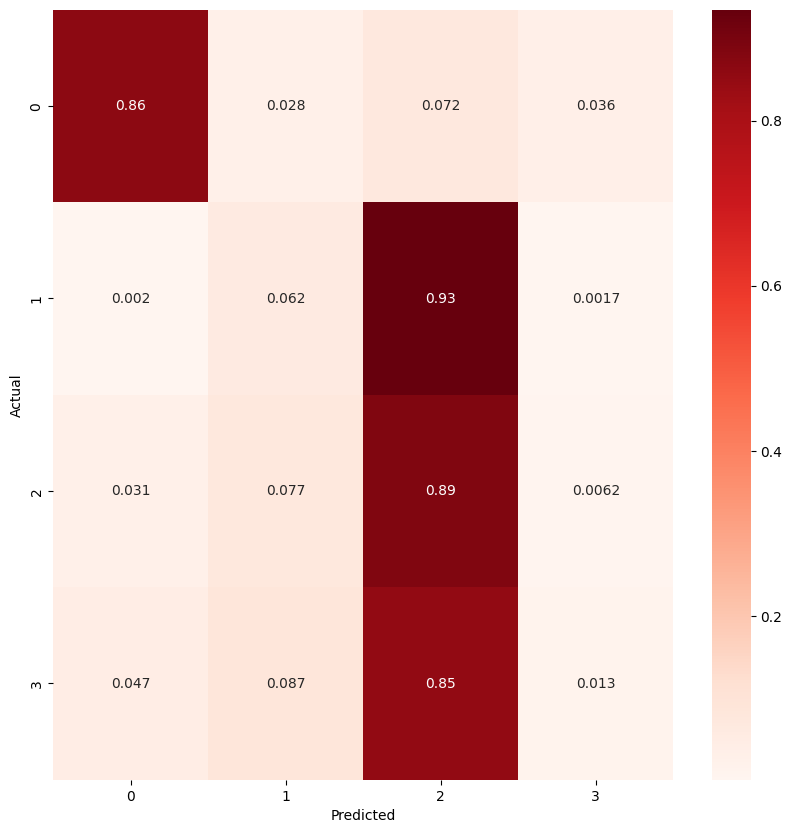

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize the confusion matrix
cm_normalized_np = cm_normalized.numpy()

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized_np, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
from monai.metrics import compute_confusion_matrix_metric

compute_confusion_matrix_metric('balanced accuracy', x)


tensor([[0.9559,    nan, 0.9555,    nan],
        [0.8709,    nan, 0.8656,    nan],
        [0.9637, 0.4653, 0.9635,    nan],
        [0.8335, 0.4505, 0.8265,    nan],
        [0.9828,    nan, 0.9828,    nan],
        [0.9400, 0.8100, 0.9395,    nan],
        [0.9724,    nan, 0.9723,    nan],
        [0.9171, 0.4758, 0.9157,    nan],
        [0.9584,    nan, 0.9583,    nan],
        [0.9693,    nan, 0.9692,    nan],
        [0.9196, 0.4565, 0.9154,    nan],
        [0.9515,    nan, 0.9508,    nan],
        [0.8815,    nan, 0.8802, 0.8855],
        [0.9230, 0.7372, 0.9272, 0.8897],
        [0.9582, 0.9616, 0.9578,    nan],
        [0.9380, 0.8936, 0.9316,    nan],
        [0.8092, 0.6468, 0.7807, 0.8810],
        [0.8611,    nan, 0.8591, 0.9113],
        [0.8830, 0.7909, 0.8817,    nan],
        [0.8473, 0.6912, 0.8517, 0.8225],
        [0.8579, 0.8338, 0.8526, 0.9322],
        [0.8508, 0.7809, 0.8428, 0.8979],
        [0.8854, 0.6120, 0.8868,    nan],
        [0.8856, 0.8677, 0.8607,  

In [ ]:
subset=np.random.choice(image_stack.shape[0], size=5, replace=False)

image_stack_subset=image_stack[subset]
mask_stack_subset=mask_stack[subset]

In [ ]:
test=segmentator.predict(image_stack_subset)

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(25, 20))  # Create a figure with 1 row and 5 columns

for i in range(5):
    axes[i].imshow(test[i, 1])
    axes[i].axis('off')  # Remove the axis labels and ticks

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [ ]:
models_dict[1]

In [70]:
from semantic_bac_segment.utils import get_device
from monai.metrics import DiceMetric, MeanIoU
import pandas as pd
import time

monai_dice=DiceMetric(include_background=True, reduction=None)
device=get_device()
metrics_df = pd.DataFrame(columns=['model_name', 'position', 'dice_metric', 'iou_metric', 'time'])

for pair_i in models_dict:

    with open(pair_i[1]) as f:
        model_param = json.load(f)
        model_i=model_loader(model_param, device)
    print(f'Evaluating model {model_param["model_name"]}')
    
    segmentator = Segmentator(pair_i[0], model_graph=model_i, patch_size=256, overlap_ratio=0.25, half_precision=True)
    tic=time.time()
    preds=segmentator.predict(image_stack[:, 0, :,:], sigmoid=True)
    tac=time.time()

    if preds.shape[1]==4:
        preds=preds[:, 1:, :,:]
    
    if preds.shape[1]==3:
        preds=np.max(preds, axis=1)
        preds=np.expand_dims(preds, axis=1)

    preds_save=preds.copy()
    preds_save=preds_save*255
    tifffile.imwrite(f'../data/prediction_check4/predas_{os.path.basename(pair_i[1])[:-12]}.tiff', preds_save.astype(np.uint8))
    monai_dice=DiceMetric(include_background=True, reduction=None)
    monai_iou=MeanIoU(include_background=True, reduction=None)

    mask_tensor=torch.from_numpy(mask_stack_binary).float()
    preds_tensor=torch.from_numpy(preds).float()
    
    dice_metrics=monai_dice(mask_tensor, preds_tensor)
    iou_metrics=monai_iou(mask_tensor, preds_tensor)

    iteration_df = pd.DataFrame({
        'model_name': [model_param['model_name']] * len(dice_metrics),
        'position': list(range(len(dice_metrics))),
       'dice_metric': dice_metrics.squeeze().tolist(),
        'iou_metric': iou_metrics.squeeze().tolist(),
        'time' : tac-tic
    })
    print(f'inference time = {tac-tic}')
    print(f'average dice metric = {torch.mean(dice_metrics)}')
    metrics_df = pd.concat([metrics_df, iteration_df], ignore_index=True)
    metrics_df.to_csv('../data/model_metrics2.csv', index=False)



Evaluating model MonaiUnet-binary-top-4
inference time = 183.86589097976685
average dice metric = nan
Evaluating model MonaiUnet-binary-top-3


/var/folders/l9/mzf3xz016nn449t2nlqp0k680000gn/T/ipykernel_34370/3954391690.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, iteration_df], ignore_index=True)
/Users/santiago/switchdrive/boeck_lab_projects/Semantic_bac_segment/experiments/../src/semantic_bac_segment/segmentator.py:186: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


inference time = 59.73834180831909
average dice metric = 0.6324490308761597
Evaluating model MonaiUnet-binary-top-3
inference time = 80.85798072814941
average dice metric = 0.6324490308761597
Evaluating model atomai_unet-binary-top-1
inference time = 84.26057171821594
average dice metric = nan
Evaluating model base_unet-binary-top-4
inference time = 346.3613090515137
average dice metric = nan
Evaluating model base_unet-binary-top-5
inference time = 371.0916347503662
average dice metric = nan
Evaluating model base_unet-binary-top-5
inference time = 398.51078486442566
average dice metric = nan
Evaluating model atomai_unet-binary-top-1
inference time = 84.75573468208313
average dice metric = nan
Evaluating model MonaiUnet-4class-4
inference time = 277.22832703590393
average dice metric = nan
Evaluating model MonaiUnet-4class-4
inference time = 277.09585881233215
average dice metric = nan
Evaluating model MonaiUnet-4class-3
inference time = 84.97199201583862
average dice metric = nan
Evalu

In [71]:
torch.nanmean(dice_metrics)

tensor(0.6325)

: 

In [ ]:
tifffile.imwrite(os.path.join('../data/prediction_check4/',"masks_cleaned.tiff"), mask_stack)

In [ ]:
import glob
import numpy as np
import tifffile

def average_tiff_stack(folder_path):
    # Get a list of all TIFF files in the folder
    tiff_files = glob.glob(folder_path + "/*.tif") + glob.glob(folder_path + "/*.tiff")
    
    # Read the TIFF files and stack them along a new axis
    stack = []
    for file in tiff_files:
        image = tifffile.imread(file)
        if image.ndim == 4:
            image = image[:, 0, :, :]
        print(image.shape)
        stack.append(image)
    #stack = np.stack(stack, axis=0)
    
    # Calculate the average of each pixel across the slices
    average = np.mean(stack, axis=0)
    
    return average

# Specify the folder path containing the TIFF files
folder_path = '../data/prediction_check4/'

# Call the function to calculate the average of the TIFF stack
average_image = average_tiff_stack(folder_path)

In [ ]:
average_image[average_image < 50] = 0
tifffile.imwrite(os.path.join('../data/prediction_check4/',"ensembl_image.tiff"), average_image.astype(np.uint8))

In [ ]:
average_image_binary = average_image.copy()

In [ ]:
average_image_binary[average_image_binary > 50] = 1
import numpy as np
from scipy.ndimage import binary_erosion

def erode_roi(average_image_binary, erosion_size=1):
    eroded_image_stack = np.zeros_like(average_image_binary)
    
    for i in range(average_image_binary.shape[0]):
        image_slice = average_image_binary[i]
        
        # Create a structuring element for erosion
        structure = np.ones((erosion_size, erosion_size), dtype=np.uint8)
        
        # Perform erosion on the current image slice
        eroded_slice = binary_erosion(image_slice, structure)
        
        eroded_image_stack[i] = eroded_slice
    
    return eroded_image_stack

# Assuming you have the average_image_binary stack with shape [slice, H, W]
eroded_image_stack = erode_roi(average_image_binary, erosion_size=3)



In [ ]:
mean_stack=eroded_image_stack*average_image

In [ ]:
from tifffile import imagej_description


labels = [os.path.basename(file) for file in image_files]

# Create the ImageJ metadata
metadata = dict(
    labels=labels
)


tifffile.imwrite(os.path.join('../data/prediction_check4/',"ensembl_image.tiff"), 
                 mean_stack.astype(np.uint8),
                 imagej=True,
                 metadata=metadata)

In [ ]:
# Export individual images

average_image=tifffile.imread('../data/prediction_check4/predas_MonaiUnet-4class-top-3_best.tiff')
for i in range(image_stack.shape[0]):
    file_i=os.path.basename(image_files[i])
    original_height, original_width=original_dimensions[os.path.basename(file_i)]
    print(f'origina_height: {original_height}, origina_width: {original_width}')
    print(f'processing image {i+1} of {len(image_files)}')
    x=average_image[i]
    x = x[:original_height, :original_width]
    x[x < 50] = 0

    print(f'new shape x: {x.shape}')
    tifffile.imwrite(f'../data/prediction_check4/separate_masks/{os.path.basename(file_i)}', x.astype(np.uint8))

